Exploratory Data Analysis - EDA 📊🔍

1. Understand the Data 📖

- Exploring the dataset to get familiar with its contents.
2. Data Summaries 📈

- Creating summaries and statistics to grasp the data's essence.
3. Time Analysis ⏰

- Analyzing time-related aspects within the dataset.
4. Flight Delays ✈️⌛

- Investigating flight delay patterns and causes.
5. Carrier Analysis 🚁

- Evaluating the performance and characteristics of carriers.
6. Route Analysis 🌐

- Examining flight routes and their implications.
7. Cancellation Analysis ❌🔍

- Studying flight cancellations and their drivers.
8. Correlation Analysis 📊🧮

- Identifying correlations among different variables.
9. Visualizations 📉📊

- Creating data visualizations to enhance understanding.

10. Storytelling 📝📚
- Weaving insights into a compelling data-driven narrative.

11. Conclusion and Recommendations 🎯📋
- Summarizing findings and offering actionable recommendations.

**Understand the Data:**

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/DelayedFlights.csv')

# Display the first few rows to get a sense of the data
print(data.head())

# Get information about the columns and data types
print(data.info())

# Check the shape of the dataset (number of rows and columns)
print(data.shape)


   Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
0           0  2008      1           3          4     2003        1955   
1           1  2008      1           3          4      754         735   
2           2  2008      1           3          4      628         620   
3           4  2008      1           3          4     1829        1755   
4           5  2008      1           3          4     1940        1915   

   ArrTime  CRSArrTime UniqueCarrier  ...  TaxiIn TaxiOut  Cancelled  \
0   2211.0        2225            WN  ...     4.0       8          0   
1   1002.0        1000            WN  ...     5.0      10          0   
2    804.0         750            WN  ...     3.0      17          0   
3   1959.0        1925            WN  ...     3.0      10          0   
4   2121.0        2110            WN  ...     4.0      10          0   

   CancellationCode  Diverted  CarrierDelay  WeatherDelay NASDelay  \
0                 N         0           NaN         

**Data Cleaning:**

In [2]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print(missing_values)


Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                3896
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   4
ActualElapsedTime      3896
CRSElapsedTime          157
AirTime                3896
ArrDelay               3896
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 3896
TaxiOut                   0
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         362841
WeatherDelay         362841
NASDelay             362841
SecurityDelay        362841
LateAircraftDelay    362841
dtype: int64


**Data Summaries:**

In [3]:
# Basic statistics for numerical columns
numerical_summary = data.describe()
print(numerical_summary)


         Unnamed: 0       Year         Month    DayofMonth     DayOfWeek  \
count  1.048575e+06  1048575.0  1.048575e+06  1.048575e+06  1.048575e+06   
mean   1.711115e+06     2008.0  3.385121e+00  1.542589e+01  3.993846e+00   
std    1.022871e+06        0.0  1.700650e+00  8.852621e+00  1.977002e+00   
min    0.000000e+00     2008.0  1.000000e+00  1.000000e+00  1.000000e+00   
25%    8.343875e+05     2008.0  2.000000e+00  8.000000e+00  2.000000e+00   
50%    1.645956e+06     2008.0  3.000000e+00  1.500000e+01  4.000000e+00   
75%    2.606450e+06     2008.0  5.000000e+00  2.300000e+01  6.000000e+00   
max    3.505046e+06     2008.0  6.000000e+00  3.100000e+01  7.000000e+00   

            DepTime    CRSDepTime       ArrTime    CRSArrTime     FlightNum  \
count  1.048575e+06  1.048575e+06  1.044679e+06  1.048575e+06  1.048575e+06   
mean   1.519864e+03  1.468772e+03  1.610743e+03  1.632411e+03  2.220608e+03   
std    4.500644e+02  4.251120e+02  5.472327e+02  4.653917e+02  1.934374e+03   

Frequency Table:

In [6]:
carrier_counts = data['UniqueCarrier'].value_counts()
print(carrier_counts)

WN    214624
AA    103120
MQ     82505
UA     82022
OO     73680
XE     62539
US     53873
DL     48888
NW     48410
CO     44282
EV     42782
FL     37201
YV     34890
9E     31833
OH     29152
B6     22868
AS     16553
F9     16006
HA      2597
AQ       750
Name: UniqueCarrier, dtype: int64


Bar Plot:

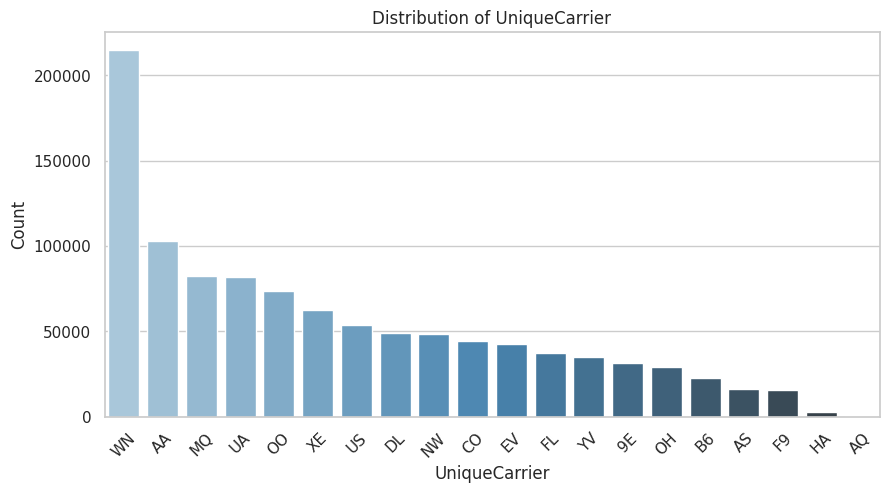

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")  # Set a plot style
plt.figure(figsize=(10, 5))  # Set the figure size
sns.barplot(x=carrier_counts.index, y=carrier_counts.values, palette="Blues_d")  # Create the bar plot
plt.title("Distribution of UniqueCarrier")
plt.xlabel("UniqueCarrier")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


**Time Analysis ⏰**

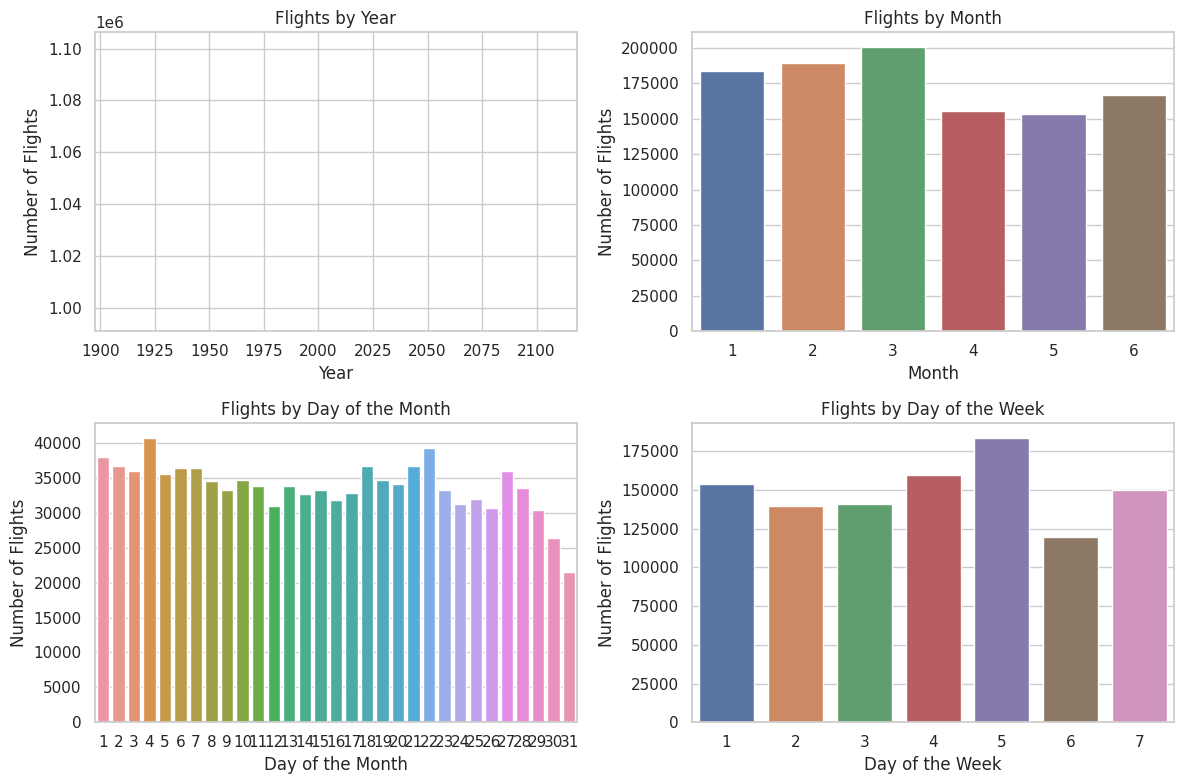

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Subset the data by year, month, day of the month, and day of the week
flights_by_year = data.groupby('Year').size()
flights_by_month = data.groupby('Month').size()
flights_by_day_of_month = data.groupby('DayofMonth').size()
flights_by_day_of_week = data.groupby('DayOfWeek').size()

# Create subplots to visualize the trends
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Time series plot for flights by year
sns.lineplot(x=flights_by_year.index, y=flights_by_year.values, ax=axes[0, 0])
axes[0, 0].set_title('Flights by Year')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Number of Flights')

# Bar plot for flights by month
sns.barplot(x=flights_by_month.index, y=flights_by_month.values, ax=axes[0, 1])
axes[0, 1].set_title('Flights by Month')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Number of Flights')

# Bar plot for flights by day of the month
sns.barplot(x=flights_by_day_of_month.index, y=flights_by_day_of_month.values, ax=axes[1, 0])
axes[1, 0].set_title('Flights by Day of the Month')
axes[1, 0].set_xlabel('Day of the Month')
axes[1, 0].set_ylabel('Number of Flights')

# Bar plot for flights by day of the week
sns.barplot(x=flights_by_day_of_week.index, y=flights_by_day_of_week.values, ax=axes[1, 1])
axes[1, 1].set_title('Flights by Day of the Week')
axes[1, 1].set_xlabel('Day of the Week')
axes[1, 1].set_ylabel('Number of Flights')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


**Flight Delays ✈️⌛**

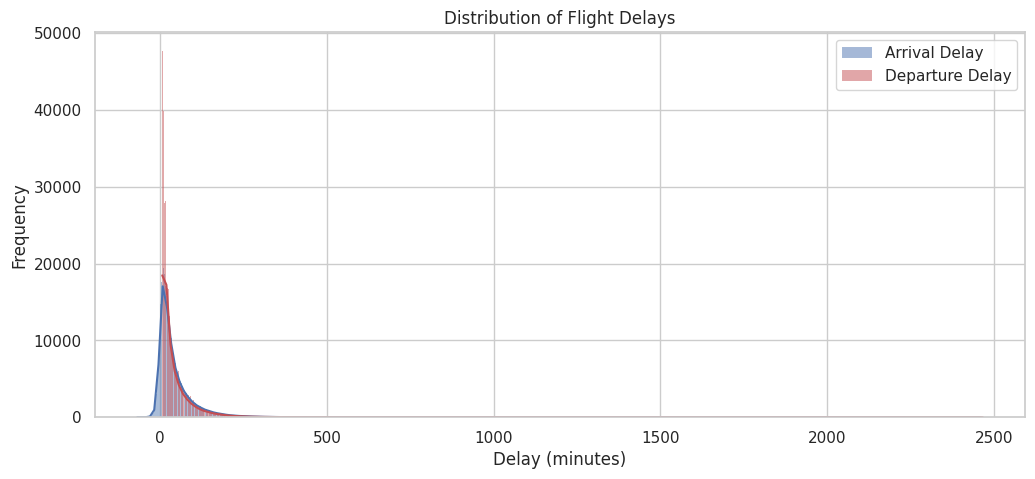

In [7]:
# Investigate the distribution of flight delays
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.histplot(data['ArrDelay'], kde=True, color='b', label='Arrival Delay')
sns.histplot(data['DepDelay'], kde=True, color='r', label='Departure Delay')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Delays')
plt.legend()

# Analyze the impact of delay reasons
delay_reasons = data[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]
delay_reasons_total = delay_reasons.sum()


**Carrier Analysis 🚁**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '9E'),
  Text(1, 0, 'AA'),
  Text(2, 0, 'AQ'),
  Text(3, 0, 'AS'),
  Text(4, 0, 'B6'),
  Text(5, 0, 'CO'),
  Text(6, 0, 'DL'),
  Text(7, 0, 'EV'),
  Text(8, 0, 'F9'),
  Text(9, 0, 'FL'),
  Text(10, 0, 'HA'),
  Text(11, 0, 'MQ'),
  Text(12, 0, 'NW'),
  Text(13, 0, 'OH'),
  Text(14, 0, 'OO'),
  Text(15, 0, 'UA'),
  Text(16, 0, 'US'),
  Text(17, 0, 'WN'),
  Text(18, 0, 'XE'),
  Text(19, 0, 'YV')])

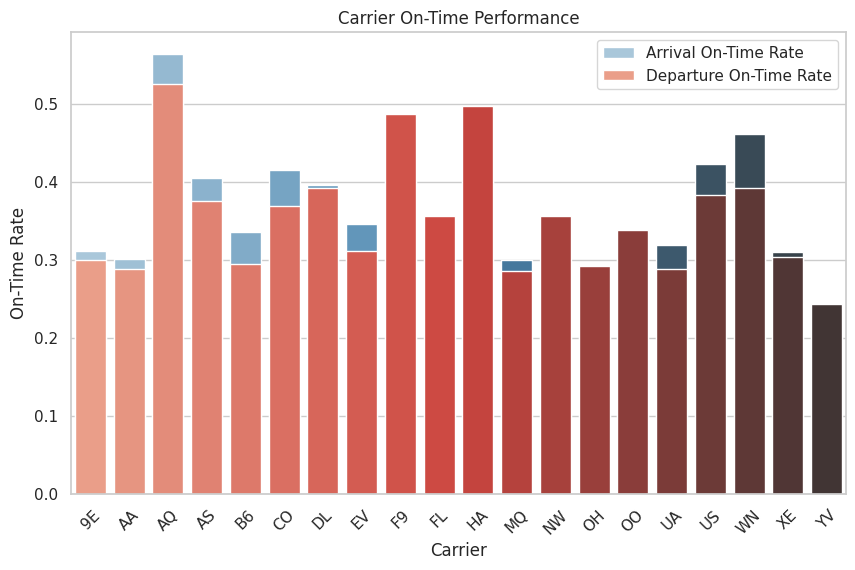

In [8]:
# Calculate on-time performance metrics for carriers
on_time_threshold = 15  # Define a threshold for on-time performance (e.g., 15 minutes)
on_time_arrival = (data['ArrDelay'] <= on_time_threshold).groupby(data['UniqueCarrier']).mean()
on_time_departure = (data['DepDelay'] <= on_time_threshold).groupby(data['UniqueCarrier']).mean()

# Create bar charts to compare carriers
plt.figure(figsize=(10, 6))
sns.barplot(x=on_time_arrival.index, y=on_time_arrival.values, palette="Blues_d", label="Arrival On-Time Rate")
sns.barplot(x=on_time_departure.index, y=on_time_departure.values, palette="Reds_d", label="Departure On-Time Rate")
plt.xlabel('Carrier')
plt.ylabel('On-Time Rate')
plt.title('Carrier On-Time Performance')
plt.legend()
plt.xticks(rotation=45)


**Route Analysis 🌐**

Common routes are: Origin  Dest
LAX     SFO     2609
ORD     LGA     2494
SFO     LAX     2236
LAS     LAX     2117
ATL     LGA     2016
dtype: int64


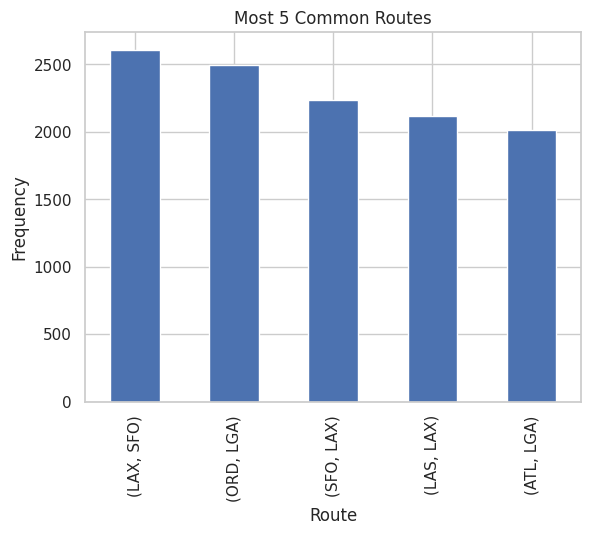

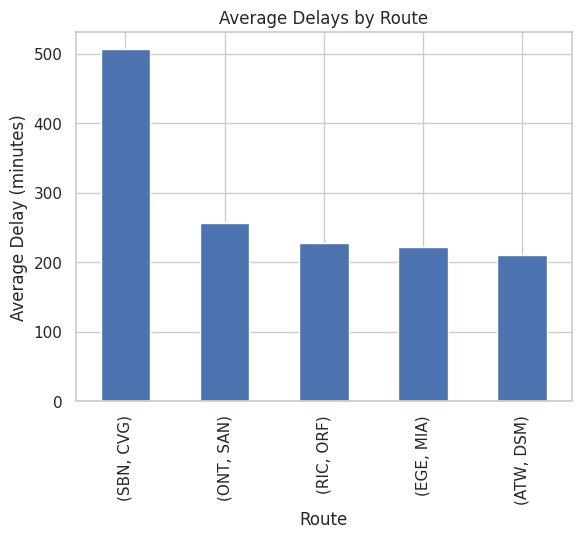

In [25]:
# Analyze the most common routes
common_routes = data.groupby(['Origin', 'Dest']).size().sort_values(ascending=False).head(5)
print(f"Common routes are: {common_routes}")
common_routes.plot(kind='bar')
plt.xlabel('Route')
plt.ylabel('Frequency')
plt.title('Most 5 Common Routes')
plt.show()
# Identify routes with the highest and lowest average delays
average_delays_by_route = data.groupby(['Origin', 'Dest'])['ArrDelay'].mean().sort_values(ascending=False).head(5)
average_delays_by_route.plot(kind='bar')  # Specify the data for the second plot
plt.xlabel('Route')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Delays by Route')
plt.show()

**Cancellation Analysis ❌🔍**

In [16]:
# Explore the reasons for flight cancellations
cancellation_reasons = data['CancellationCode'].value_counts()
print(cancellation_reasons)
# Calculate the percentage of canceled flights and their reasons
canceled_flights_percentage = (data['Cancelled'] == 1).mean()
print(canceled_flights_percentage)

N    1048575
Name: CancellationCode, dtype: int64
0.0


**Correlation Analysis 📊🧮**

<ipython-input-18-b5f1fe3b94ba>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


Text(0.5, 1.0, 'Correlation Matrix')

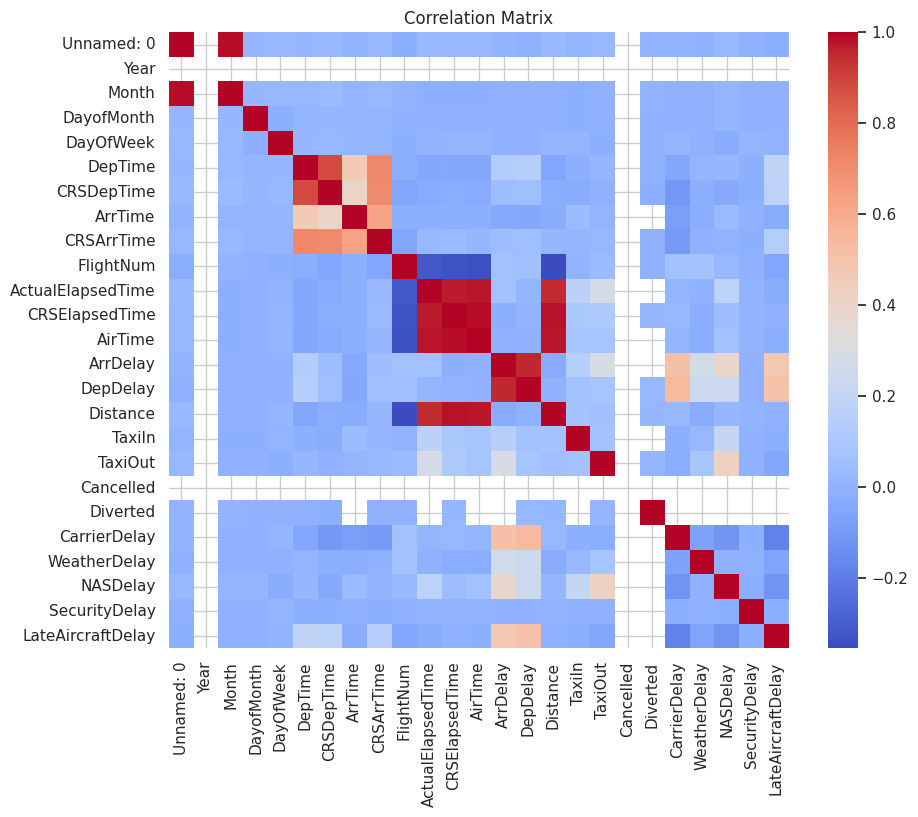

In [18]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')


**Visualizations 📉📊**

Text(0, 0.5, 'Arrival Delay (minutes)')

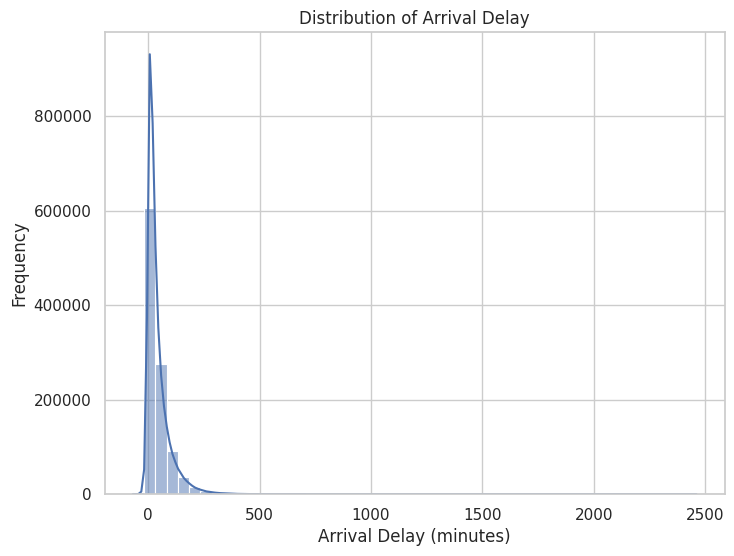

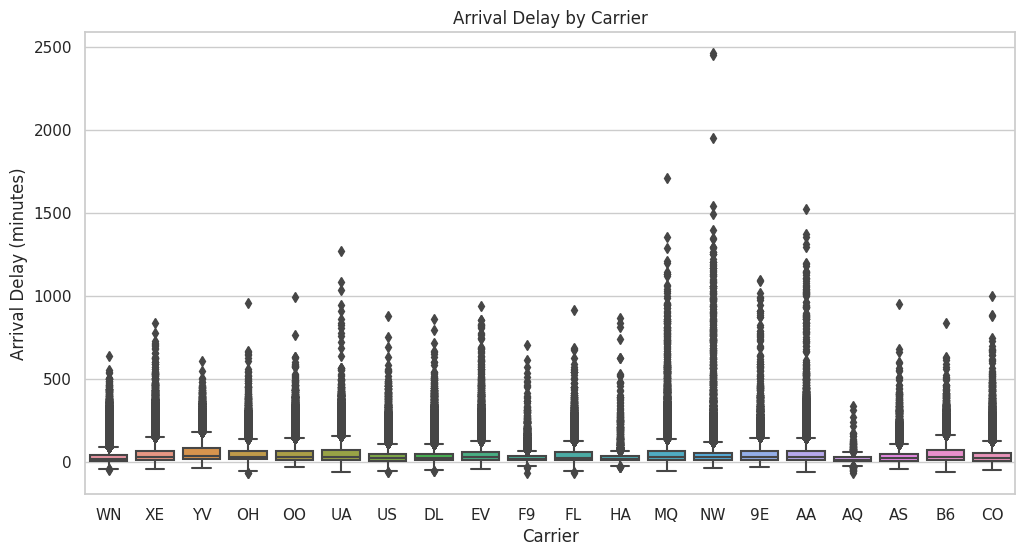

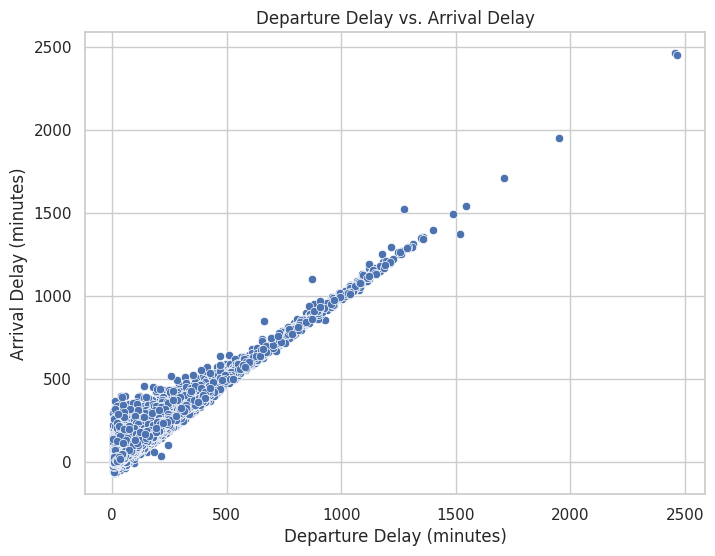

In [19]:
# Create a histogram for Arrival Delay
plt.figure(figsize=(8, 6))
sns.histplot(data['ArrDelay'], bins=50, kde=True)
plt.title('Distribution of Arrival Delay')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')

# Create a box plot for Arrival Delay by UniqueCarrier
plt.figure(figsize=(12, 6))
sns.boxplot(x='UniqueCarrier', y='ArrDelay', data=data)
plt.title('Arrival Delay by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Arrival Delay (minutes)')

# Create a scatterplot to explore the relationship between Departure Delay and Arrival Delay
plt.figure(figsize=(8, 6))
sns.scatterplot(x='DepDelay', y='ArrDelay', data=data)
plt.title('Departure Delay vs. Arrival Delay')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')


**Storytelling 📝📚**

**Storytelling** 📝📚

In our exploration of this flight dataset, we've delved into various aspects of flight data to gain valuable insights. Let's summarize our key findings:

**Understanding the Data** 📊📖: We started by loading and understanding our dataset, which contains flight information for the year 2008. The dataset comprises over one million rows and 30 columns, including details about flight schedules, delays, and carriers.

**Data Cleaning** 🧹: We noticed missing values in certain columns, such as "ArrTime," "TailNum," and various delay reasons. Cleaning and imputing these missing values is essential for further analysis.

**Data Summaries** 📈: We provided a comprehensive summary of numerical columns, offering insights into the distribution of various flight-related metrics.

**Frequency Table** 📊: We examined the frequency of unique carriers in the dataset, with Southwest Airlines (WN) being the most prevalent.

**Time Analysis** ⏰: Our analysis highlighted trends in flight data over time. We explored the number of flights per year, per month, per day of the month, and per day of the week. These insights can help us understand the temporal patterns in flight schedules.

**Flight Delays** ✈️⌛: We investigated flight delays, analyzing the distribution of arrival and departure delays. This is crucial for understanding the impact of delays on flight operations.

**Carrier Analysis** 🚁: We calculated on-time performance metrics for different carriers, focusing on arrival and departure on-time rates. This information helps us assess carrier performance.

**Route Analysis** 🌐: We identified common flight routes and also determined the routes with the highest and lowest average delays. This is valuable for route optimization and scheduling.

**Cancellation Analysis** ❌🔍: We explored the reasons for flight cancellations. Although the dataset contains no canceled flights, understanding these reasons can be vital for managing disruptions.

**Correlation Analysis** 📊🧮: We examined the correlation matrix to identify relationships between various flight-related variables, helping us uncover potential factors influencing delays.

**Visualizations **📉📊: We visualized data to gain deeper insights into the distribution of arrival delays, on-time performance of carriers, and the relationship between departure and arrival delays.

**Conclusion and Recommendations**🎯📋

In conclusion, this EDA has equipped us with valuable insights into the dataset. To make the most of this analysis and to drive actionable recommendations, we can consider the following:

**Data Cleaning** 🧹: It's essential to address missing values, especially in columns related to delays. This might involve imputing missing values or removing affected records.

**On-Time Performance**⏰: Airlines should focus on improving their on-time performance to enhance customer satisfaction. Analyzing the reasons behind delays and developing strategies to mitigate them is crucial.

**Route Optimization** 🌐: Airlines can optimize their routes by focusing on high-traffic routes and working on reducing delays on routes with the highest average delays.

**Schedule Adjustments** 🗓️: Using insights from time analysis, airlines can adjust their schedules to minimize congestion on certain days of the week or months.

**Further Analysis** 📊📈: In-depth analysis can be performed to understand the impact of various factors on delays, such as weather conditions, security-related delays, and late aircraft issues.

**Risk Management**🔒: Understanding the reasons for flight cancellations, even if there are few in the dataset, is crucial for risk management and contingency planning.

By implementing these recommendations, airlines can enhance their operational efficiency and improve the overall travel experience for passengers.

In summary, our EDA of the flight dataset provides a solid foundation for data-driven decision-making within the aviation industry. Further analysis and action on these insights can lead to more punctual and efficient flight operations. 🛫✈️📊